In [6]:
import pandas as pd
df = pd.read_csv(r'C:\Users\TEJASWINI\Desktop\ecommerce.csv')
print("Initial missing values per column:")
print(df.isnull().sum())
df['Return_Date'] = df['Return_Date'].fillna('Not Applicable')
df['Days_to_Return'] = df['Days_to_Return'].fillna(0)
df['Return_Reason'] = df['Return_Reason'].fillna('Not Returned')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0 and col not in ['Return_Date', 'Return_Reason']:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum())
df.to_csv('ecommerce_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'ecommerce_cleaned.csv'")

Initial missing values per column:
Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason       4948
Return_Status          0
Days_to_Return      4948
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64

Missing values after cleaning:
Order_ID            0
Product_ID          0
User_ID             0
Order_Date          0
Return_Date         0
Product_Category    0
Product_Price       0
Order_Quantity      0
Return_Reason       0
Return_Status       0
Days_to_Return      0
User_Age            0
User_Gender         0
User_Location       0
Payment_Method      0
Shipping_Method     0
Discount_Applied    0
dtype: int64

Cleaned dataset saved as 'ecommerce_cleaned.csv'


Return Percentage by Product Category:
                  total_orders  returns  return_percentage
Product_Category                                          
Clothing                  2000     1049          52.450000
Electronics               1985     1011          50.931990
Books                     2041     1034          50.661440
Toys                      1944      963          49.537037
Home                      2030      995          49.014778

Return Percentage by Supplier:
          total_orders  returns  return_percentage
Supplier                                          
PROD             10000     5052              50.52

Return Reasons by Category (%):
Return_Reason     Changed mind  Defective  Not as described  Wrong item
Product_Category                                                       
Books                     25.0       25.3              23.4        26.2
Clothing                  26.2       26.0              24.2        23.5
Electronics               22.5       27.0 

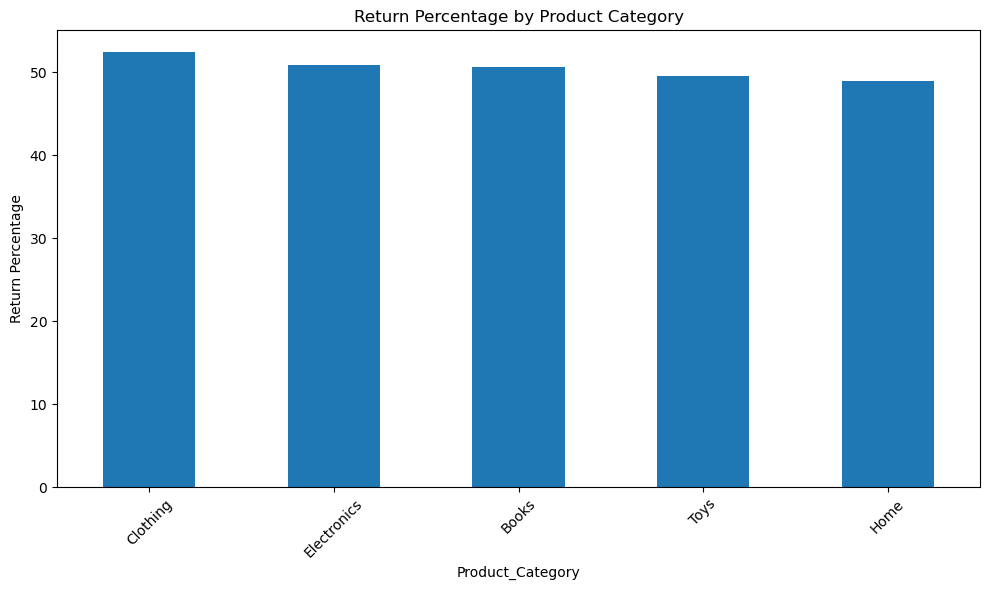

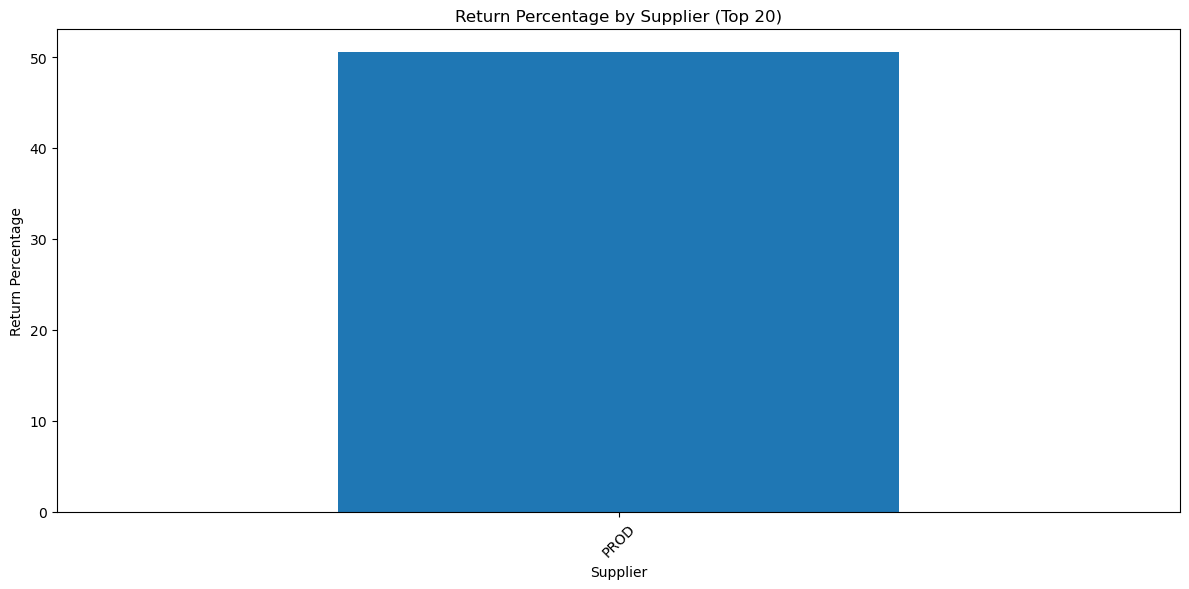

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\TEJASWINI\Desktop\ecommerce.csv')
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d-%m-%Y') 
df['Return_Date'] = pd.to_datetime(df['Return_Date'], format='%d-%m-%Y', errors='coerce', dayfirst=True)
df['Is_Returned'] = df['Return_Status'] == 'Returned'
category_returns = df.groupby('Product_Category')['Is_Returned'].agg(
    total_orders='count',
    returns='sum',
    return_percentage=lambda x: (x.sum() / x.count()) * 100
).sort_values('return_percentage', ascending=False)
df['Supplier'] = df['Product_ID'].str.extract(r'([A-Z]+)')[0]
supplier_returns = df.groupby('Supplier')['Is_Returned'].agg(
    total_orders='count',
    returns='sum',
    return_percentage=lambda x: (x.sum() / x.count()) * 100
).sort_values('return_percentage', ascending=False)
return_reasons = df[df['Is_Returned']].groupby(['Product_Category', 'Return_Reason']).size().unstack().fillna(0)
return_reasons_percentage = return_reasons.div(return_reasons.sum(axis=1), axis=0) * 100
print("Return Percentage by Product Category:")
print(category_returns)
print("\nReturn Percentage by Supplier:")
print(supplier_returns)
print("\nReturn Reasons by Category (%):")
print(return_reasons_percentage.round(1))
plt.figure(figsize=(10, 6))
category_returns['return_percentage'].plot(kind='bar')
plt.title('Return Percentage by Product Category')
plt.ylabel('Return Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
supplier_returns.head(20)['return_percentage'].plot(kind='bar')
plt.title('Return Percentage by Supplier (Top 20)')
plt.ylabel('Return Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1484
           1       0.51      0.51      0.51      1516

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000


Confusion Matrix:
[[738 746]
 [737 779]]


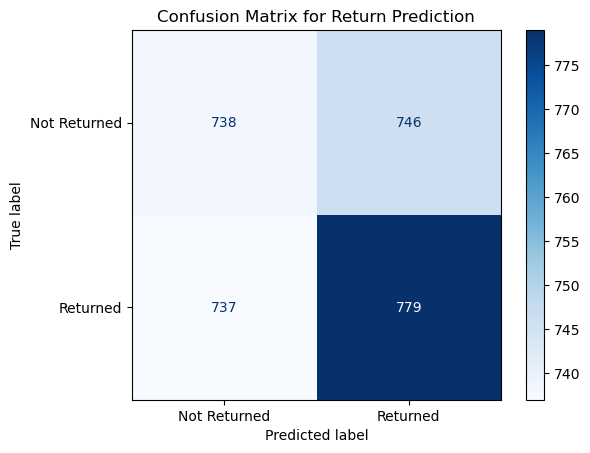


Feature Importance:
            Feature  Importance
1     Product_Price    0.257785
7  Discount_Applied    0.257059
3          User_Age    0.208006
2    Order_Quantity    0.075595
0  Product_Category    0.069647
5    Payment_Method    0.058640
6   Shipping_Method    0.047688
4       User_Gender    0.025579


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\TEJASWINI\Desktop\ecommerce.csv')
df['Is_Returned'] = (df['Return_Status'] == 'Returned').astype(int)
features = [
    'Product_Category', 
    'Product_Price',
    'Order_Quantity',
    'User_Age',
    'User_Gender',
    'Payment_Method',
    'Shipping_Method',
    'Discount_Applied'
]

X = df[features]
y = df['Is_Returned']
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Returned', 'Returned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Return Prediction')
plt.show()
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49      1484
           1       0.52      0.54      0.53      1516

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000


Confusion Matrix:
[[717 767]
 [701 815]]


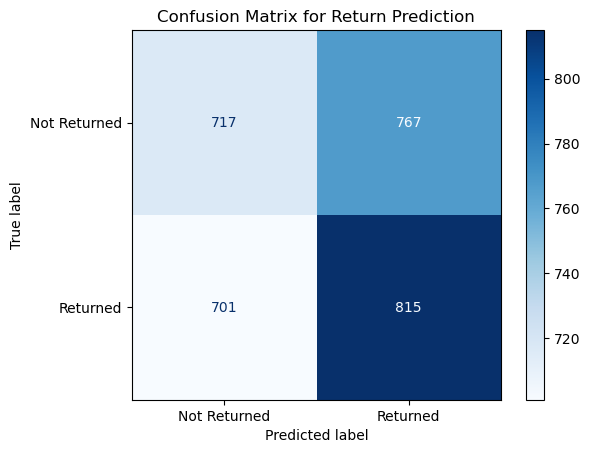


ROC AUC Score: 0.513


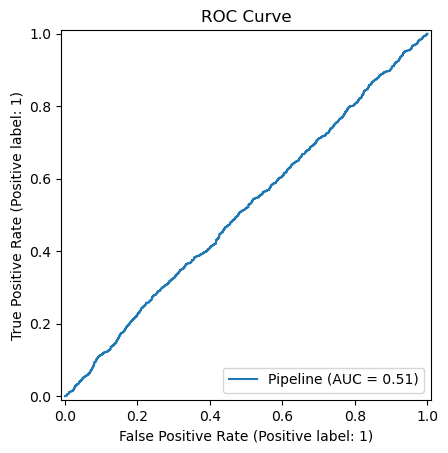


Top Features Affecting Return Probability:
                         Feature  Coefficient  Odds_Ratio
5      Product_Category_Clothing     0.061094    1.062999
12     Payment_Method_Debit Card     0.042055    1.042952
3               Discount_Applied     0.040516    1.041348
16      Shipping_Method_Next-Day     0.032684    1.033224
11    Payment_Method_Credit Card     0.032575    1.033111
6   Product_Category_Electronics     0.030048    1.030504
13      Payment_Method_Gift Card     0.016834    1.016976
1                 Order_Quantity     0.009470    1.009515
4         Product_Category_Books     0.007815    1.007846
10              User_Gender_Male     0.007304    1.007331

Bottom Features Affecting Return Probability:
                     Feature  Coefficient  Odds_Ratio
4     Product_Category_Books     0.007815    1.007846
10          User_Gender_Male     0.007304    1.007331
9         User_Gender_Female    -0.007476    0.992551
2                   User_Age    -0.009500    0.990545
1

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (classification_report, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay,
                            roc_auc_score,
                            RocCurveDisplay)
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\TEJASWINI\Desktop\ecommerce.csv')
df['Is_Returned'] = (df['Return_Status'] == 'Returned').astype(int)
features = [
    'Product_Category',  # categorical
    'Product_Price',     # numerical
    'Order_Quantity',    # numerical
    'User_Age',          # numerical
    'User_Gender',       # categorical
    'Payment_Method',    # categorical
    'Shipping_Method',   # categorical
    'Discount_Applied'   # numerical
]
X = df[features]
y = df['Is_Returned']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        class_weight='balanced',  # handles class imbalance
        max_iter=1000,
        solver='lbfgs'
    ))
])
log_reg.fit(X_train, y_train)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of return
y_pred = log_reg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Returned', 'Returned'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Return Prediction')
plt.show()
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('ROC Curve')
plt.show()
ohe_feature_names = log_reg.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)
coefficients = log_reg.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients)
}).sort_values('Odds_Ratio', ascending=False)
print("\nTop Features Affecting Return Probability:")
print(coef_df.head(10))
print("\nBottom Features Affecting Return Probability:")
print(coef_df.tail(10))
sample_order = X_test.iloc[[0]]  # First test sample
prob_return = log_reg.predict_proba(sample_order)[0, 1]
print(f"\nExample order return probability: {prob_return:.1%}")
print("Order details:")
print(sample_order)